In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from skimage.io import imshow
import matplotlib.pyplot as plt



/Library/Python/2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#global parameters
batch_size = 128
epochs = 10
num_classes = 10
img_x, img_y = 28, 28


In [3]:
#loading in data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#preprocessing data
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [5]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [32]:
#CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
          
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ["accuracy"])
          
          


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1481 - acc: 0.9551 - val_loss: 0.0294 - val_acc: 0.9911
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0399 - acc: 0.9875 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 3/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0264 - acc: 0.9917 - val_loss: 0.0260 - val_acc: 0.9913
Epoch 4/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0386 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0149 - acc: 0.9954 - val_loss: 0.0288 - val_acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0112 - acc: 0.9965 - val_loss: 0.0262 - val_acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0116 - acc: 0.9961 - val_loss: 0.0327 - val_acc

ValueError: x and y must have same first dimension, but have shapes (24,) and (10,)

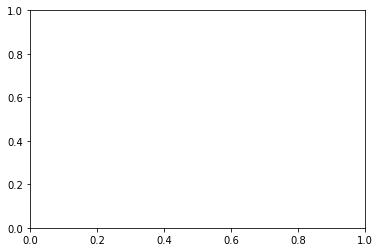

In [33]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

        
history = AccuracyHistory()

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test), callbacks = [history])
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])
plt.plot(range(1, 25), history.acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
